#01.SETUP

In [2]:
import os

In [3]:
cd /root/Share/LOTUSROOM/lotusroom_notebooks

/root/Share/LOTUSROOM/lotusroom_notebooks


In [4]:
!pip install transformers==4.25.1
!pip install bitsandbytes-cuda111==0.26.0
!pip install datasets==1.16.1
!pip install bitsandbytes loguru
!pip install discord.py
!pip install diffusers --upgrade
!pip install invisible_watermark transformers accelerate safetensors
!pip install transformers --upgrade
!pip install langdetect
!pip install scipy
!pip install tensorboard
!pip install ctranslate2 sentencepiece
!pip install -q diffusers transformers accelerate peft
!pip install googletrans==4.0.0-rc1

  Using cached transformers-4.25.1-py3-none-any.whl.metadata (93 kB)
  Using cached tokenizers-0.13.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
Using cached transformers-4.25.1-py3-none-any.whl (5.8 MB)
Using cached tokenizers-0.13.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (7.8 MB)
DEPRECATION: pytorch-lightning 1.7.7 has a non-standard dependency specifier torch>=1.9.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.2
    Uninstalling tokenizers-0.15.2:
      Successfully uninstalled tokenizers-0.15.2
  Attempting uninstall: transformers
    Found existing installation: transformers 4.37.2
    Uninstalling tr

In [5]:
import os
from config._tokens import *
os.environ['TOKEN1'] = token1
os.environ['TOKEN2'] = token2
os.environ['TOKEN3'] = token3

#02.LOAD GPTs & SD

In [6]:
from gptj import config, tokenizer, GPTJForCausalLM
import torch
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
#gpt = GPTJForCausalLM.from_pretrained("./saved_models_gpt-j-6B-8bit/gpt-j-6B",low_cpu_mem_usage=True)
gpt = GPTJForCausalLM.from_pretrained("/root/Share/LOTUSROOM/mary-shelly", revision="float16", torch_dtype=torch.float32, low_cpu_mem_usage=True)
gpt.to(device)


/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/conda/lib/python3.10/site-packages/torch/_utils.py:831: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  return self.fget.__get__(instance, owner)()


lm_head Linear(in_features=4096, out_features=50400, bias=True)
k_proj Linear(in_features=4096, out_features=4096, bias=False)
v_proj Linear(in_features=4096, out_features=4096, bias=False)
q_proj Linear(in_features=4096, out_features=4096, bias=False)
out_proj Linear(in_features=4096, out_features=4096, bias=False)
fc_in Linear(in_features=4096, out_features=16384, bias=True)
fc_out Linear(in_features=16384, out_features=4096, bias=True)
k_proj Linear(in_features=4096, out_features=4096, bias=False)
v_proj Linear(in_features=4096, out_features=4096, bias=False)
q_proj Linear(in_features=4096, out_features=4096, bias=False)
out_proj Linear(in_features=4096, out_features=4096, bias=False)
fc_in Linear(in_features=4096, out_features=16384, bias=True)
fc_out Linear(in_features=16384, out_features=4096, bias=True)
k_proj Linear(in_features=4096, out_features=4096, bias=False)
v_proj Linear(in_features=4096, out_features=4096, bias=False)
q_proj Linear(in_features=4096, out_features=4096, b

Some weights of the model checkpoint at /root/Share/LOTUSROOM/mary-shelly were not used when initializing GPTJForCausalLM: ['lm_head.adapter.0.weight', 'lm_head.adapter.1.weight', 'transformer.h.0.attn.k_proj.adapter.0.weight', 'transformer.h.0.attn.k_proj.adapter.1.weight', 'transformer.h.0.attn.out_proj.adapter.0.weight', 'transformer.h.0.attn.out_proj.adapter.1.weight', 'transformer.h.0.attn.q_proj.adapter.0.weight', 'transformer.h.0.attn.q_proj.adapter.1.weight', 'transformer.h.0.attn.v_proj.adapter.0.weight', 'transformer.h.0.attn.v_proj.adapter.1.weight', 'transformer.h.0.mlp.fc_in.adapter.0.weight', 'transformer.h.0.mlp.fc_in.adapter.1.weight', 'transformer.h.0.mlp.fc_out.adapter.0.weight', 'transformer.h.0.mlp.fc_out.adapter.1.weight', 'transformer.h.1.attn.k_proj.adapter.0.weight', 'transformer.h.1.attn.k_proj.adapter.1.weight', 'transformer.h.1.attn.out_proj.adapter.0.weight', 'transformer.h.1.attn.out_proj.adapter.1.weight', 'transformer.h.1.attn.q_proj.adapter.0.weight', 't

GPTJForCausalLM(
  (transformer): GPTJModel(
    (wte): FrozenBNBEmbedding(50400, 4096)
    (drop): Dropout(p=0.0, inplace=False)
    (h): ModuleList(
      (0-27): 28 x GPTJBlock(
        (ln_1): LayerNorm((4096,), eps=1e-05, elementwise_affine=True)
        (attn): GPTJAttention(
          (attn_dropout): Dropout(p=0.0, inplace=False)
          (resid_dropout): Dropout(p=0.0, inplace=False)
          (k_proj): FrozenBNBLinear(4096, 4096)
          (v_proj): FrozenBNBLinear(4096, 4096)
          (q_proj): FrozenBNBLinear(4096, 4096)
          (out_proj): FrozenBNBLinear(4096, 4096)
        )
        (mlp): GPTJMLP(
          (fc_in): FrozenBNBLinear(4096, 16384)
          (fc_out): FrozenBNBLinear(16384, 4096)
          (act): NewGELUActivation()
          (dropout): Dropout(p=0.0, inplace=False)
        )
      )
    )
    (ln_f): LayerNorm((4096,), eps=1e-05, elementwise_affine=True)
  )
  (lm_head): FrozenBNBLinear(4096, 50400)
)

In [7]:
async def get_mary_response(prompt, min_words=128, max_words=128):
    global device, tokenizer, gpt
    prompt = tokenizer(prompt, return_tensors='pt')
    prompt = {key: value.to(device) for key, value in prompt.items()}
    out = gpt.generate(**prompt, min_length=min_words, max_length=max_words, do_sample=True)
    return tokenizer.decode(out[0])

In [8]:
from diffusers import AutoPipelineForImage2Image

#pipe = AutoPipelineForText2Image.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16").to("cuda")
pipe = AutoPipelineForImage2Image.from_pretrained("stabilityai/sdxl-turbo", torch_dtype=torch.float16, variant="fp16").to("cuda:1")
pipe.load_lora_weights("/root/Share/LOTUSROOM/LoRA/diaphanera.safetensors", adapter_name="diaphanera")
pipe.set_adapters(["diaphanera"], adapter_weights=[1.0])




Loading pipeline components...: 100%|███████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00,  9.14it/s]


In [9]:
from PIL import Image
init_image = Image.open("/root/Share/LOTUSROOM/ref/HR_0266.jpg").resize((900,900))

negative_prompt = "lowres, bad anatomy, bad hands, text, error, missing fingers, extra digit, fewer digits, cropped, worst quality, low quality, normal quality, jpeg artifacts, signature, watermark, username, blurry"
seed=0
generator = torch.manual_seed(seed)


In [10]:
import random
prompt_list=['a piece of agate with a red and white pattern', 'a large piece of blue and white marble', 'a piece of agate with a blue and yellow pattern', 'a large piece of agate with a very large center', 'a piece of agate with a red and white stripe', 'a green and white stone with a black background', 'a large piece of pink and white rock', 'a piece of yellow agate with black spots', 'a piece of white and gold marble with a triangle', 'a piece of red and green agate', 'a large piece of agate with a diamond in the center', 'a large piece of red and black agate', 'a piece of rock with a hole in it', 'a white vase with a green center on a black surface', 'a green and yellow stone with a black background', 'a piece of agate with a black and white pattern', 'a piece of rock with a very large piece of rock in the middle', 'a piece of rock with a very colorful pattern', 'a piece of agate with a pattern of swirls', 'a piece of agate with a face on it', 'a large piece of art with a very colorful design', 'a piece of rock with a piece of rock in it', 'a piece of agate with a hole in it', 'a large piece of rock with a very large center', 'a piece of rock with a black and white pattern', 'a blue and white piece of rock with water inside', 'a piece of agate with a yellow and white swirl', 'a piece of rock with a white object in it', 'a picture of a lake with a sky in the background', 'a piece of agate with a black bird on it', 'a piece of agate with a pattern of swirls', 'a large piece of red and white rock with a black hole', 'a piece of rock with a very large piece of rock', 'a piece of red and white rock with a black background', 'a large piece of rock with a large crystal in it', 'a piece of agate with a red and white stripe', 'a slice of agate with a black background', 'a large piece of agate with a white and blue pattern', 'a slice of agate with a red and yellow stripe', 'a piece of rock with a cross on it', 'a slice of agate with a red center', 'a large piece of white and brown agate', 'a large slice of agate with a face on it', 'a piece of rock with a very large piece of material']
base_prompt = "((((diaphanera)))), ((("+ random.choice(prompt_list) +")))"
print (base_prompt)

((((diaphanera)))), (((a piece of agate with a black bird on it)))


In [11]:
def generate_sd(prompt):
    with torch.no_grad():  # 勾配計算を無効化
        base_prompt = f"diaphanera, {random.choice(prompt_list)}"
        print (base_prompt+prompt)
        image = pipe(
            prompt=f"{base_prompt}, ((({prompt})))",
            width=894,
            height=894,
            image=init_image,
            negative_prompt=negative_prompt,
            generator=generator,
            strength=0.63,
            guidance_scale=7.0,
            num_inference_steps=25).images[0]
    return image

diaphanera, a piece of rock with a very large piece of rock


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.73it/s]


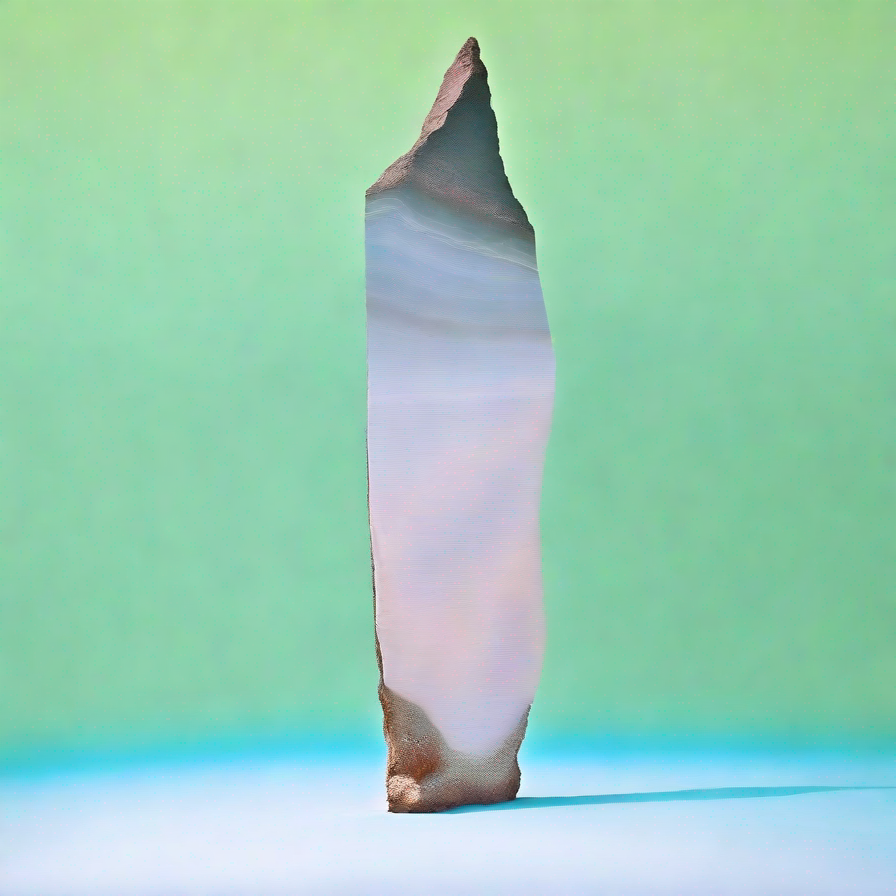

In [12]:
prompt=''
generate_sd(prompt)

In [13]:
#!pip install openai --upgrade
import locale
locale.getpreferredencoding = lambda: "UTF-8"
!pip install openai==0.28

# 2. APIキーを設定
import openai
import os

from config._api_key import openai_api
openai.api_key = openai_api
os.environ['OPENAI_API'] = openai_api

async def get_gpt4_response(prompt, model="gpt-4-0125-preview", tokens=1000):
    response = await openai.ChatCompletion.acreate(
        model=model,
        messages=[
            {"role": "system", "content": "You are a brilliant fashion design assistant."},
            {"role": "user", "content": prompt},
        ],
        max_tokens=tokens,
        temperature=0.7,
    )
    return response




DEPRECATION: pytorch-lightning 1.7.7 has a non-standard dependency specifier torch>=1.9.*. pip 24.0 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pytorch-lightning or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [14]:
prompt='eureka'
await get_mary_response(prompt)

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


'eureka.instance.hostName" value="#settings.eureka.instance.url"/>\n        </entry>\n        <entry key="eureka.instance.nonCoreServicesPort">\n            <value>8091</value>\n        </entry>\n        <entry key="eureka.instance.statusPagePath">\n            <value>/actuator/'

In [15]:
await get_gpt4_response(prompt)

<OpenAIObject chat.completion id=chatcmpl-8uYhLy6Ama0oYdKPxOgl4tFjFue9c at 0x7efb446a5260> JSON: {
  "id": "chatcmpl-8uYhLy6Ama0oYdKPxOgl4tFjFue9c",
  "object": "chat.completion",
  "created": 1708490439,
  "model": "gpt-4-0125-preview",
  "choices": [
    {
      "index": 0,
      "message": {
        "role": "assistant",
        "content": "It sounds like you've had a moment of inspiration or a breakthrough idea! That's fantastic. How can I assist you with your Eureka moment? Whether it's brainstorming, refining your idea, or figuring out how to bring it to life in the world of fashion design, I'm here to help."
      },
      "logprobs": null,
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 21,
    "completion_tokens": 62,
    "total_tokens": 83
  },
  "system_fingerprint": "fp_d0c0cfacb3"
}

# 03.LOAD LOTUS

In [16]:
import logging

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger('discord')
logger.setLevel(logging.ERROR)
handler = logging.FileHandler(filename='discord.log', encoding='utf-8', mode='w')
handler.setFormatter(logging.Formatter('%(asctime)s:%(levelname)s:%(name)s: %(message)s'))
logger.addHandler(handler)

In [17]:
from config.prompts import *

In [18]:
import discord
import os
import openai
import asyncio
import re
from datetime import datetime
import shutil
from asyncio import sleep

from langdetect import detect as lang_detect
from langdetect import LangDetectException

from googletrans import Translator

BG_EXT = ".gif"
BG_GIF_PATH = f'/root/Share/LOTUSROOM/GDrive/3dlogo_typ_bg{BG_EXT}'

#initial
intents = discord.Intents.default()
intents.message_content = True
client_gpt = discord.Client(intents=intents)
client_mary = discord.Client(intents=intents)

token_mary = os.environ['TOKEN2']
token_gpt = os.environ['TOKEN1']
openai.api_key = os.environ['OPENAI_API']

client_gpt_id = None
client_mary_id = None
user_who_typed_mary_id = None

dialogue_log = ""
question = ""
loop_value = 1

min_words_mary = 150
max_words_mary = 250

last_mary_message_time = None
question_list = []

from config._discord import *

async def move_old_images(destination_folder, log_folder, keep_files_count=5):
    """
    Move all files except the latest 'keep_files_count' from the destination folder to the log folder.
    """
    os.makedirs(log_folder, exist_ok=True)

    files = [f for f in os.listdir(destination_folder) if os.path.isfile(os.path.join(destination_folder, f))]
    files.sort(key=lambda x: os.path.getmtime(os.path.join(destination_folder, x)), reverse=True)  # sort files by modification time

    for file in files[keep_files_count:]:  # Skip the latest 'keep_files_count' files
        old_path = os.path.join(destination_folder, file)
        new_path = os.path.join(log_folder, file)
        shutil.move(old_path, new_path)

def detect_language(text):
    try:
        return lang_detect(text)
    except LangDetectException:
        return "en"

def response_editor(response):
  if "。" in response:
      response = response.rsplit("。", 1)[0] + "。"
  elif "." in response:
      response = response.rsplit(".", 1)[0] + "."
  elif "\n" in response:
      response = response.rsplit("\n", 1)[0]
  return response

def extract_text(pattern, text):
    match = re.search(pattern, text, re.DOTALL)
    if match:
        return match.group(1).strip()
    return ""

def translate_text(text, dest_language='ja'):
    translator = Translator()
    translation = translator.translate(text, dest=dest_language)
    return translation.text

@client_mary.event
async def on_ready():
  global client_mary_id
  print(f'Welcome {client_mary.user}')
  client_mary_id = client_mary.user.id

async def on_reset(message, dialogue_log, question):
    dialogue_log = ""
    question = ""
    return dialogue_log, question

@client_mary.event
async def on_message(message):
  global dialogue_log, loop_value, question, question_list, last_mary_message_time

  if (str(message.channel.id) in specific_channel_ids) and ((message.author.name in specific_user_names) or (message.author.id in specific_user_ids)):
    dialogue_log = ""
    last_mary_message_time = datetime.now()
    user_who_typed_mary_id = message.author.id
    user_who_typed_mary_name = message.author.name
    dialogue_log, question = await on_reset(message, dialogue_log, question)
    loop_value = 2
    text = message.content.lstrip()
    dialogue_log += f'{user_who_typed_mary_name}: {text}\n'

    text_lang = detect_language(text)
    await on_generate(text, message, text_lang, loop_value)

    while loop_value >1:
      await on_generate(question, message, text_lang, loop_value-1)
      loop_value -=1
    dialogue_log, question = await on_reset(message, dialogue_log, question)
      
    now = datetime.now()
    date_time = now.strftime("%Y%m%d_%H%M%S")

    for idx in range(1,8):
        destination_folder = f"/root/Share/LOTUSROOM/GDrive/AX01/{str(idx).zfill(2)}/"
        base_directory = os.path.dirname(os.path.dirname(destination_folder))
        log_folder = os.path.join(base_directory, 'logs', os.path.basename(destination_folder))
        await move_old_images(destination_folder, log_folder, keep_files_count=5)
    dialogue_log, question = await on_reset(message, dialogue_log, question)

async def on_sd(prompt, str_idx):
    image = generate_sd(prompt)
    save_path = f'/root/Share/LOTUSROOM/GDrive/AX01/{str_idx}/'
    now = datetime.now()
    date_time = now.strftime("%Y%m%d_%H%M%S")
    file_path = f"{save_path}generated_image_{date_time}.png"
    image.save(f"{file_path}")
    print(f"{file_path}")
    base_directory = os.path.dirname(os.path.dirname(save_path))
    log_folder = os.path.join(base_directory, 'logs', os.path.basename(save_path))
    await move_old_images(save_path, log_folder)
    return file_path

@client_mary.event
async def on_generate(prompt, message, text_lang='ja', loop_value=None):
    lang_idx = 0 if text_lang == 'ja' else 1
    global dialogue_log, question, question_list
    
    channel = client_mary.get_channel(message.channel.id)
    thinking_msg = await channel.send(f"（thinking...）")
    mary_raw_response = await get_mary_response(prompt, min_words_mary, max_words_mary)
    mary_response = response_editor(mary_raw_response[len(prompt):])

    dialogue_log += f'Mary: {mary_response}\n'

    await thinking_msg.delete()  
    if mary_response.strip():
        await message.channel.send(mary_response)
    else:
        await message.channel.send("???????")

    await client_gpt.wait_until_ready()
    channel = client_gpt.get_channel(message.channel.id)
    thinking_msg = await channel.send(f"（thinking...）")

    text = f'{GPTPROMPT_A[lang_idx]}\n{ATTENTION_MSG[lang_idx]}\nMary:{mary_response}\n{LANGUAGE_MSG[lang_idx]}'
    response = await get_gpt4_response(text)
    gpt_response= response['choices'][0]['message']['content']
    if text_lang != detect_language(gpt_response):
        gpt_response = translate_text(gpt_response, text_lang)
    interpretation = extract_text(fr"{A_FORMAT[lang_idx]}\s*(.*?)\s*(?=\n|$)", gpt_response)
    preview_interpolation = f"```{interpretation}```"
    try:
      await thinking_msg.delete()
    except discord.errors.NotFound:
      print("The message was already deleted or not found.")
    await channel.send(preview_interpolation)

    generating_msg = await channel.send(f"（generating...）")
    text = f'{GPTPROMPT_B[lang_idx]}\n{interpretation}\n{LANGUAGE_MSG[lang_idx]}'
    response = await get_gpt4_response(text)
    gpt_response= response['choices'][0]['message']['content']
    prompt_proposal = extract_text(fr"{B_FORMAT[lang_idx]}\s*(.*?)\s*(?=\n|$)", gpt_response)
    print (f"text: {text_lang}, prompt_proposal: {detect_language(prompt_proposal)}")

    file_path = await on_sd(prompt_proposal, '01') 
    with open(file_path, 'rb') as f:
        await channel.send(file=discord.File(f))
    try:
      await generating_msg.delete()
    except discord.errors.NotFound:
            print("The message was already deleted or not found.")

    if loop_value > 1:
        thinking_msg = await channel.send(f"（thinking...）")
        text = f'{GPTPROMPT_C[lang_idx]}\n{interpretation}\n{LANGUAGE_MSG[lang_idx]}'
        response = await get_gpt4_response(text)
        gpt_response= response['choices'][0]['message']['content']
        if text_lang != detect_language(gpt_response):
            gpt_response = translate_text(gpt_response, text_lang)
        question = extract_text(fr"{C_FORMAT[lang_idx]}\s*(.*?)\s*(?=\n|$)", gpt_response)
        question_list.append(question)
        try:
          await thinking_msg.delete()
        except discord.errors.NotFound:
          print("The message was already deleted or not found.")
        await channel.send(question)
    else:
        for i in range(2,8):
          _ = await on_sd(prompt_proposal, str(i).zfill(2))
        
    dialogue_log += f'GPT4: {question}\n'

@client_gpt.event
async def on_ready():
  global client_gpt_id
  print(f'Welcome {client_gpt.user}')
  client_gpt_id = client_gpt.user.id

async def main():
    # Start the Discord clients
    client_tasks = asyncio.gather(
        client_mary.start(token_mary),
        client_gpt.start(token_gpt)
    )

    await client_tasks


In [ ]:
await main()

Welcome ChatGPT#5062
Welcome MaryGPT#9745


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
ERROR:discord.client:Attempting a reconnect in 0.15s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
ERROR:discord.client:Attempting a reconnect in 1.51s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
INFO:ope

text: en, interpretation: ja
T text: en, interpretation: en


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=3424 request_id=req_6b431b4456b7aad9650e6c4e328f5094 response_code=200
Token indices sequence length is longer than the specified maximum sequence length for this model (81 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ical progress.)))']
Token indices sequence length is longer than the specified maximum sequence length for this model (81 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['ical progress.)))']


text: en, prompt_proposal: en
diaphanera, a piece of rock with a black and white patternEthereal landscapes, rejuvenating slumbers, rhythmic awakenings, sartorial resurrection, vibrant tapestries of innovation, revival rhythms dancing through threads, fabrics whispering tales of rest and resurgence, craftsmanship celebrating the cyclical beauty of creation and recreation, garments embodying the essence of rebirth and rhythmical progress.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.79it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240221_134202.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=1957 request_id=req_5686bc177a96f5da256898f9f7212391 response_code=200


text: en, Q: ja
T text: en, Q: en


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=13202 request_id=req_8301bbc18d0f3c07796fcceeaca70235 response_code=200


text: en, interpretation: ja
T text: en, interpretation: en


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=6257 request_id=req_8d44c4c6c545c35898f809e600b524c9 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [')))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [')))']


text: en, prompt_proposal: en
diaphanera, a piece of red and white rock with a black backgroundEnvision a realm where time intertwines, modern silhouettes dance with the echoes of nostalgia, urban vibrancy meets serene past, clothing a bridge between eras, adorned with chains of heritage, floral whispers on fabric, playful dough art transforming wearables into tales of whimsy, elegance reborn.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.78it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240221_134304.png
diaphanera, a piece of agate with a face on itEnvision a realm where time intertwines, modern silhouettes dance with the echoes of nostalgia, urban vibrancy meets serene past, clothing a bridge between eras, adorned with chains of heritage, floral whispers on fabric, playful dough art transforming wearables into tales of whimsy, elegance reborn.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.76it/s]


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240221_134311.png
diaphanera, a large piece of pink and white rockEnvision a realm where time intertwines, modern silhouettes dance with the echoes of nostalgia, urban vibrancy meets serene past, clothing a bridge between eras, adorned with chains of heritage, floral whispers on fabric, playful dough art transforming wearables into tales of whimsy, elegance reborn.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.75it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [')))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [')))']


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240221_134318.png
diaphanera, a large piece of agate with a white and blue patternEnvision a realm where time intertwines, modern silhouettes dance with the echoes of nostalgia, urban vibrancy meets serene past, clothing a bridge between eras, adorned with chains of heritage, floral whispers on fabric, playful dough art transforming wearables into tales of whimsy, elegance reborn.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.74it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [')))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [')))']


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240221_134325.png
diaphanera, a white vase with a green center on a black surfaceEnvision a realm where time intertwines, modern silhouettes dance with the echoes of nostalgia, urban vibrancy meets serene past, clothing a bridge between eras, adorned with chains of heritage, floral whispers on fabric, playful dough art transforming wearables into tales of whimsy, elegance reborn.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.72it/s]


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240221_134331.png
diaphanera, a piece of agate with a black bird on itEnvision a realm where time intertwines, modern silhouettes dance with the echoes of nostalgia, urban vibrancy meets serene past, clothing a bridge between eras, adorned with chains of heritage, floral whispers on fabric, playful dough art transforming wearables into tales of whimsy, elegance reborn.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.71it/s]


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240221_134338.png
diaphanera, a green and yellow stone with a black backgroundEnvision a realm where time intertwines, modern silhouettes dance with the echoes of nostalgia, urban vibrancy meets serene past, clothing a bridge between eras, adorned with chains of heritage, floral whispers on fabric, playful dough art transforming wearables into tales of whimsy, elegance reborn.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.70it/s]
ERROR:discord.client:Attempting a reconnect in 0.10s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
ERROR:discord.client:Attempting a reconnect in 3.97s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.Conn

/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240221_134345.png


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=21104 request_id=req_fffe98d8931da85a3d6f59af292e075c response_code=200


text: en, interpretation: ja
T text: en, interpretation: en


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=6472 request_id=req_839902e866bb68014145866e15f55e5a response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['hue a chapter in an unfolding epic. amidst this tapestry, figures emerge, cloaked in the paradox of visibility and invisibility, their attire a homage to the unspoken beauty of " nice looks ", a rebellion against the mundane, a celebration of the unseen artistry in the cinematic wardrobe.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['hue a chapter in an unfolding epic. amidst this tapestry, figures emerge, cloaked in the paradox of visibility and invisibility, their attire a homage to the unspoken beauty of " nice looks ", a rebellion against the mundane, a celebration of the unseen artistry in the cinematic wardrobe.)))']


text: en, prompt_proposal: en
diaphanera, a piece of rock with a cross on itEthereal, cinematic landscapes meet the intricate dance of shadows and light, encapsulating the essence of storytelling through fabric, whispers of ancient lore intertwining with the avant-garde. Envision, a realm where the visceral textures of the Mortal Instrument series are reborn, each stitch a narrative, each hue a chapter in an unfolding epic. Amidst this tapestry, figures emerge, cloaked in the paradox of visibility and invisibility, their attire a homage to the unspoken beauty of "Nice Looks", a rebellion against the mundane, a celebration of the unseen artistry in the cinematic wardrobe.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.76it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240221_134517.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=2794 request_id=req_a282f66526effb3ea4988153b95161b4 response_code=200


text: en, Q: ja
T text: en, Q: en


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=19246 request_id=req_82890c1b530f5596457e89ee61113b17 response_code=200


text: en, interpretation: ja
T text: en, interpretation: en


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=3687 request_id=req_2360d78bf3c77a66ffea1082f3ee4975 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['future, surrealism cradling realism.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['future, surrealism cradling realism.)))']


text: en, prompt_proposal: en
diaphanera, a piece of agate with a black and white patternEnigmatic landscapes, silhouette whispers, avant-garde dreamscape, ethereal beauty meets urban decay, timeless elegance clashing with modern dystopia, exploring the psyche of the unseen wearer, vibrant hues bleeding into monochrome, fabric narratives woven from the whispers of the past and the shouts of the future, surrealism cradling realism.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.77it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240221_134625.png


The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['the future, surrealism cradling realism.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['the future, surrealism cradling realism.)))']


diaphanera, a large piece of agate with a diamond in the centerEnigmatic landscapes, silhouette whispers, avant-garde dreamscape, ethereal beauty meets urban decay, timeless elegance clashing with modern dystopia, exploring the psyche of the unseen wearer, vibrant hues bleeding into monochrome, fabric narratives woven from the whispers of the past and the shouts of the future, surrealism cradling realism.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.76it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['surrealism cradling realism.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['surrealism cradling realism.)))']


/root/Share/LOTUSROOM/GDrive/AX01/02/generated_image_20240221_134634.png
diaphanera, a large piece of white and brown agateEnigmatic landscapes, silhouette whispers, avant-garde dreamscape, ethereal beauty meets urban decay, timeless elegance clashing with modern dystopia, exploring the psyche of the unseen wearer, vibrant hues bleeding into monochrome, fabric narratives woven from the whispers of the past and the shouts of the future, surrealism cradling realism.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.73it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['surrealism cradling realism.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['surrealism cradling realism.)))']


/root/Share/LOTUSROOM/GDrive/AX01/03/generated_image_20240221_134640.png
diaphanera, a slice of agate with a black backgroundEnigmatic landscapes, silhouette whispers, avant-garde dreamscape, ethereal beauty meets urban decay, timeless elegance clashing with modern dystopia, exploring the psyche of the unseen wearer, vibrant hues bleeding into monochrome, fabric narratives woven from the whispers of the past and the shouts of the future, surrealism cradling realism.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.72it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['surrealism cradling realism.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['surrealism cradling realism.)))']


/root/Share/LOTUSROOM/GDrive/AX01/04/generated_image_20240221_134647.png
diaphanera, a large piece of blue and white marbleEnigmatic landscapes, silhouette whispers, avant-garde dreamscape, ethereal beauty meets urban decay, timeless elegance clashing with modern dystopia, exploring the psyche of the unseen wearer, vibrant hues bleeding into monochrome, fabric narratives woven from the whispers of the past and the shouts of the future, surrealism cradling realism.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.71it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', surrealism cradling realism.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: [', surrealism cradling realism.)))']


/root/Share/LOTUSROOM/GDrive/AX01/05/generated_image_20240221_134654.png
diaphanera, a piece of agate with a hole in itEnigmatic landscapes, silhouette whispers, avant-garde dreamscape, ethereal beauty meets urban decay, timeless elegance clashing with modern dystopia, exploring the psyche of the unseen wearer, vibrant hues bleeding into monochrome, fabric narratives woven from the whispers of the past and the shouts of the future, surrealism cradling realism.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.70it/s]
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['the future, surrealism cradling realism.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['the future, surrealism cradling realism.)))']


/root/Share/LOTUSROOM/GDrive/AX01/06/generated_image_20240221_134701.png
diaphanera, a piece of rock with a very large piece of materialEnigmatic landscapes, silhouette whispers, avant-garde dreamscape, ethereal beauty meets urban decay, timeless elegance clashing with modern dystopia, exploring the psyche of the unseen wearer, vibrant hues bleeding into monochrome, fabric narratives woven from the whispers of the past and the shouts of the future, surrealism cradling realism.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.69it/s]
ERROR:discord.client:Attempting a reconnect in 0.57s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.ConnectionClosed: Shard ID None WebSocket closed with 1000
ERROR:discord.client:Attempting a reconnect in 6.04s
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/discord/client.py", line 659, in connect
    await self.ws.poll_event()
  File "/opt/conda/lib/python3.10/site-packages/discord/gateway.py", line 646, in poll_event
    raise ConnectionClosed(self.socket, shard_id=self.shard_id, code=code) from None
discord.errors.Conn

/root/Share/LOTUSROOM/GDrive/AX01/07/generated_image_20240221_134708.png


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=8434 request_id=req_f83f17140f1221d8fd0fbaa1ee0d29d1 response_code=200
INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=3323 request_id=req_02338a922343825ff668ed74879b2a33 response_code=200
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['intercultural bridge - building.)))']
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['intercultural bridge - building.)))']


text: en, prompt_proposal: en
diaphanera, a large piece of blue and white marbleEthereal tapestry, multicultural embrace, coexistence mosaic, unity in diversity, cultural confluence, American odyssey, ethnic symphony, lifestyle amalgam, societal enrichment, strength in variety, future harmony, celebratory weave, diversity challenge, conflict resolution, belief spectrum, vision of unity, myriad facets celebration, intercultural bridge-building.


100%|█████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:05<00:00,  2.77it/s]


/root/Share/LOTUSROOM/GDrive/AX01/01/generated_image_20240221_134929.png


INFO:openai:message='OpenAI API response' path=https://api.openai.com/v1/chat/completions processing_ms=2393 request_id=req_4ce5f198141d7206b9a1251c7629596e response_code=200


text: en, Q: ja
T text: en, Q: en


Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.
